In [1]:
import numpy as np
# import scipy.special for the sigmoid function ('expit()')
from scipy import special
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# neural network class definition
class neuralNetwork:
    
    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set the number of nodes in each input, hidden and output layer
        self.i_nodes = inputnodes
        self.h_nodes = hiddennodes
        self.o_nodes = outputnodes
        
        # link weight matrices wih and who
        # weights inside the arrays are w_i_j, where link is from node i to j in the next layer
        # w11 w21
        # w12 w22 etc

        # the simple way:
        # (we substract 0.5 to have values between -0.5 and +0.5)
        # self.wih = (np.random.rand(self.h_nodes, self.i_nodes) - 0.5)
        # self.who = (np.random.rand(self.o_nodes, self.h_nodes) - 0.5)
        
        # better way of doing the above is using a normal distribution around zero
        # with a standard deviation related to the number of incoming links to a node:
        # 1/√(number of incoming links) (in other words: the number of incoming links ** -0.5)
        self.wih = np.random.normal(0.0, pow(self.i_nodes, - 0.5), (self.h_nodes, self.i_nodes))
        self.who = np.random.normal(0.0, pow(self.h_nodes, - 0.5), (self.o_nodes, self.h_nodes))
        
        # set the learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function ('expit' in scipy.special package)
        self.activation_function = lambda x: special.expit(x)

        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # convert inputs_list and targets_list to 2d array (and transpose them)
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals coming into and out of hidden layer
        # inputs 𝗫 = 𝗪 · 𝗜 using the matrix dot product function
        hidden_inputs = np.dot(self.wih, inputs)
        # outputs 𝗢 = sigmoid(𝗫) using sigmoid function as activation function
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals coming into and out of output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # output error is (target output - actual output)
        output_errors = targets - final_outputs
        
        # to train the model to learn from output_errors, we need to adjust
        # the weights and backpropagate adjustments to the previous layers
        # errors coming from the hidden layer is output_errors split by weights,
        # and then recombined again at each hidden node
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights for the links between hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # update the weights for the links between input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs_list to 2d array and transpose it
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate signals coming from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals coming from the output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# load the mnist training data csv file
training_data_file = open("dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
# train the neural network

# go through all the records in the training data set
for record in training_data_list:
    
    # split the records at ','
    all_values = record.split(',')
    
    # scale and shift the inputs from 0-255 to 0.01-1.0
    # (np.asfarray forces float type)
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # create the target output values (all values at 0.01 except desired label at 0.99)
    target_outputs = np.zeros(output_nodes) + 0.01

    # all_values[0] is the target label for this record
    target_outputs[int(all_values[0])] = 0.99

    n.train(inputs, target_outputs)
    
    pass

In [6]:
test_data_file = open("dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [7]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


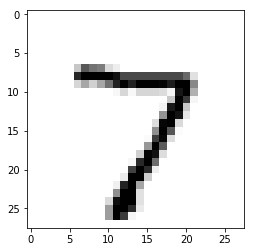

In [8]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [9]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.11336268],
       [0.08401492],
       [0.04606143],
       [0.18436664],
       [0.18511866],
       [0.04187602],
       [0.0379323 ],
       [0.43697011],
       [0.10559383],
       [0.08048212]])

In [10]:
# test the neural network

# initialize scorecard, to track for how well the network performs
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    
    # split the records at ','
    all_values = record.split(',')
    
    # correct answer for this record
    correct_label = int(all_values[0])
    print(f"Correct label: {correct_label}")
    
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # query the network
    outputs = n.query(inputs)
    
    # index of highest value corresponds to the label
    output_label = np.argmax(outputs)
    print(f"Output label: {output_label}")

    # if output correct, add one to score
    if (output_label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    pass

print(f"Score: {scorecard}")

pass


Correct label: 7
Output label: 7
Correct label: 2
Output label: 3
Correct label: 1
Output label: 1
Correct label: 0
Output label: 0
Correct label: 4
Output label: 4
Correct label: 1
Output label: 1
Correct label: 4
Output label: 4
Correct label: 9
Output label: 3
Correct label: 5
Output label: 1
Correct label: 9
Output label: 7
Score: [1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
